In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy.stats import f as fisher

In [3]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + \
        np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [216]:
def in_elipsis(x, data, conf=.95):
    n, p = data.shape
    right = (n-1) * p * fisher.ppf(q=conf, dfn=n-p, dfd=p) / (n-p)
    temp = data.mean(axis=0) - x
    S = np.cov(data.T)
    left = n * temp.dot(S**-1).dot(temp)
    return left <= right

In [158]:
N = 250
d = 2

objective_function = objective_function_F1

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [233]:
sigma = 0.25

orig = objective_function(original_individual)
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut = objective_function(mutations)
    print (mut > orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -2
45.2 % lepszych
Najlepszy: -5.6567198129 

50.8 % lepszych
Najlepszy: -3.80434584688 

42.8 % lepszych
Najlepszy: -5.52547791443 

48.0 % lepszych
Najlepszy: -5.47357226218 

46.0 % lepszych
Najlepszy: -4.37615939979 

46.8 % lepszych
Najlepszy: -6.07834355413 

50.8 % lepszych
Najlepszy: -4.37217649126 

45.2 % lepszych
Najlepszy: -4.18249297453 

48.0 % lepszych
Najlepszy: -4.59909906292 

52.8 % lepszych
Najlepszy: -4.29364058657 



In [234]:
def plot_():
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    
#     points = np.concatenate([X.ravel()[:,np.newaxis], Y.ravel()[:,np.newaxis]], axis=1)
#     for p in points:
#         if in_elipsis(p, mutations):
#             plt.plot(p[0], p[1], 'k+')
    plt.show()

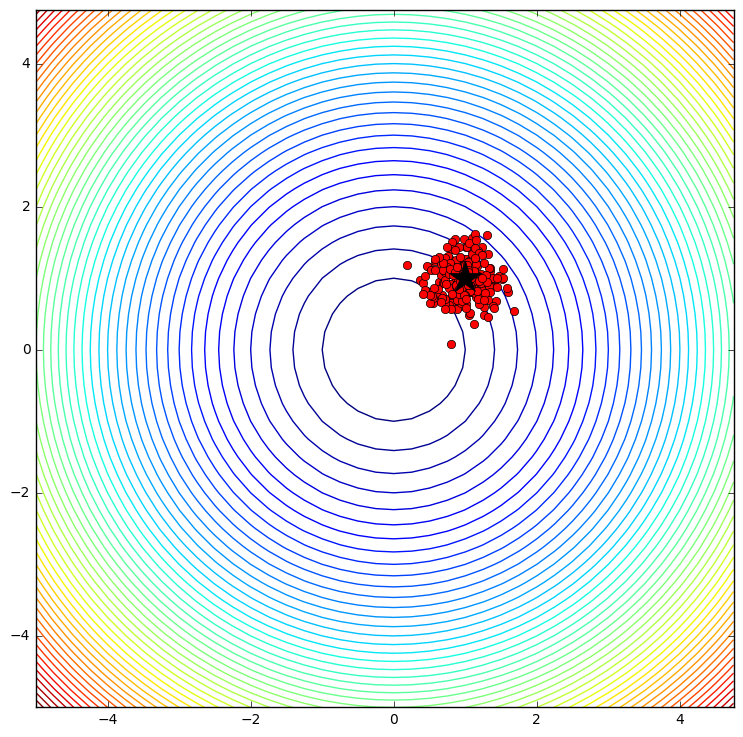

In [235]:
plot_()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [236]:
sigma = np.array([0.25, 0.5])
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut = objective_function(mutations)
    print (mut > orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -2
46.4 % lepszych
Najlepszy: -7.39082385315 

46.4 % lepszych
Najlepszy: -6.77649735947 

40.4 % lepszych
Najlepszy: -7.26067885858 

50.4 % lepszych
Najlepszy: -7.59735907719 

42.8 % lepszych
Najlepszy: -8.39786775142 

46.4 % lepszych
Najlepszy: -7.37475642877 

47.6 % lepszych
Najlepszy: -6.37982703813 

46.0 % lepszych
Najlepszy: -5.94316687363 

47.2 % lepszych
Najlepszy: -5.80574661308 

44.8 % lepszych
Najlepszy: -8.01397233939 



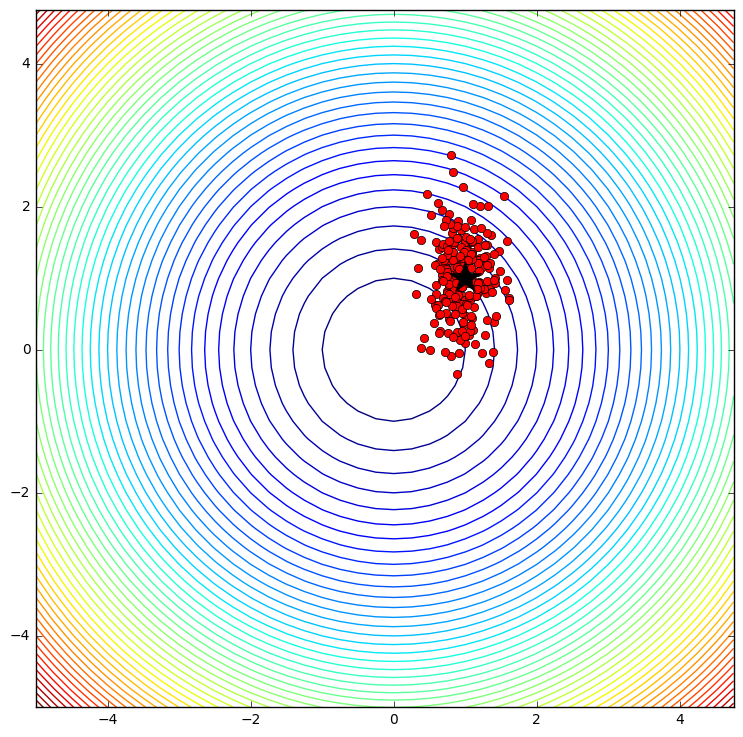

In [237]:
plot_()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

Rozkład Choleskiego pomaga generować zmienne z wielowymiarowym rozkładem normalnym, jak poniżej.
Zmienna *mutations* ma rozkład $\mathcal{N}(OriginalIndividual, \boldsymbol{S})$.

In [75]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    mut = objective_function(mutations)
    print (mut > orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -2
46.8 % lepszych
Najlepszy: -15.786572828 

43.6 % lepszych
Najlepszy: -12.2426596127 

54.8 % lepszych
Najlepszy: -15.4784484 

44.4 % lepszych
Najlepszy: -11.3490003371 

45.6 % lepszych
Najlepszy: -13.7686725087 

48.4 % lepszych
Najlepszy: -10.8458728973 

51.6 % lepszych
Najlepszy: -16.3499311103 

50.8 % lepszych
Najlepszy: -14.6566751314 

44.0 % lepszych
Najlepszy: -11.8279659039 

52.4 % lepszych
Najlepszy: -12.137011082 



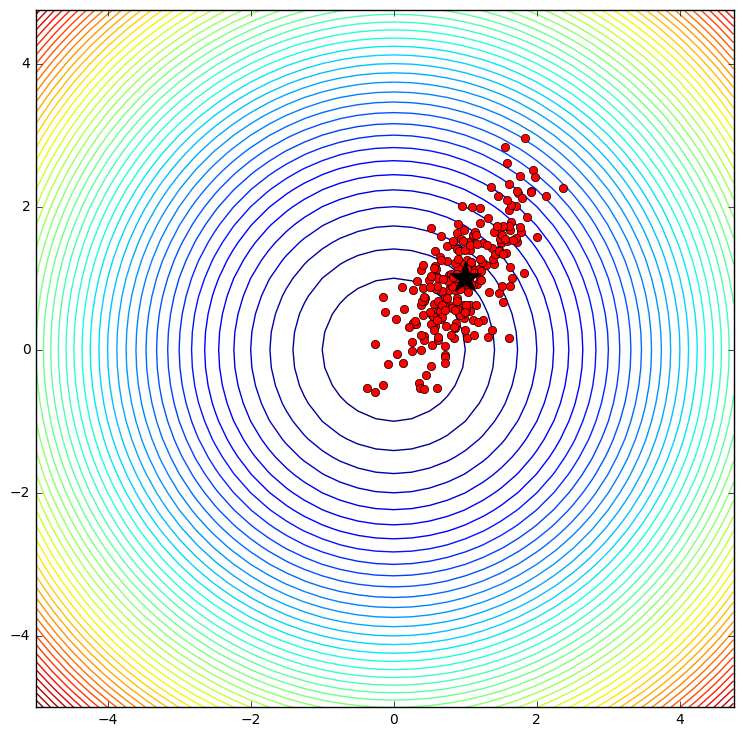

In [76]:
plot_()

# To samo dla Rastrigina

In [4]:
N = 250
d = 2

objective_function = objective_function_F6

original_individual = np.array([[1, 1.25]])

In [5]:
sigma = 0.25

orig = objective_function(original_individual)
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut = objective_function(mutations)
    print (mut > orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -12.5625
26.8 % lepszych
Najlepszy: -42.7859677457 

26.8 % lepszych
Najlepszy: -44.4476172667 

24.0 % lepszych
Najlepszy: -43.1397658034 

27.2 % lepszych
Najlepszy: -42.2848863449 

29.6 % lepszych
Najlepszy: -43.9106987024 

29.2 % lepszych
Najlepszy: -43.2269670228 

22.0 % lepszych
Najlepszy: -43.4522845476 

30.4 % lepszych
Najlepszy: -44.4453988586 

29.2 % lepszych
Najlepszy: -43.9331615485 

29.6 % lepszych
Najlepszy: -42.2123869471 



In [8]:
def plot_():
    domain_X = np.arange(-1, 3, 0.25)
    domain_Y = np.arange(-1, 3, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro', markersize=2)
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'ro', markersize=10)
#     plt.xlim(0,2)
#     plt.ylim(0,2)

    points = np.concatenate([X.ravel()[:,np.newaxis], Y.ravel()[:,np.newaxis]], axis=1)
    points_values = objective_function(points)
    print np.var(points_values, axis=0)

    plt.show()

118.423828125


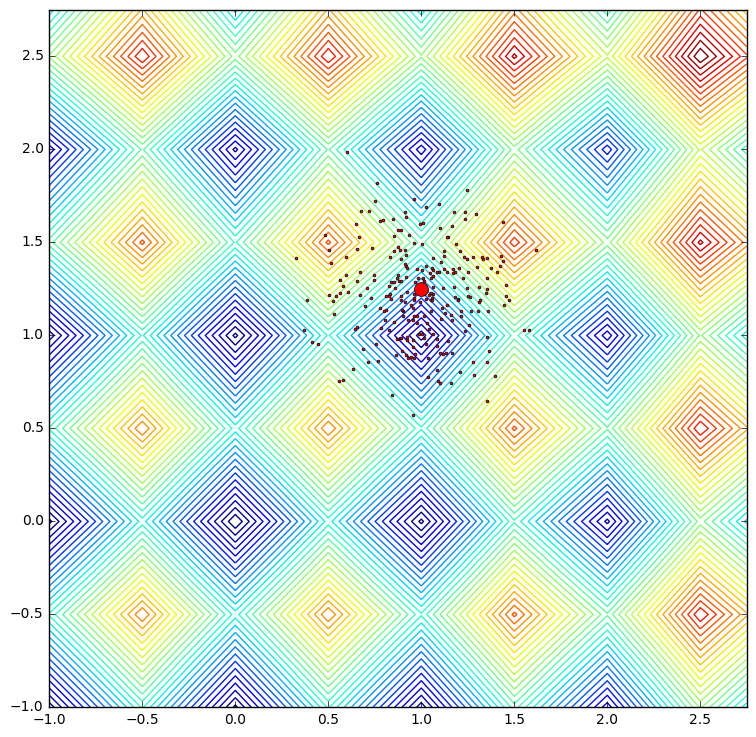

In [9]:
plot_()

In [87]:
sigma = np.array([0.25, 0.5])
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut = objective_function(mutations)
    print (mut > orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -12.5625
25.2 % lepszych
Najlepszy: -44.2106172104 

20.8 % lepszych
Najlepszy: -42.9208990746 

25.6 % lepszych
Najlepszy: -43.677391022 

24.0 % lepszych
Najlepszy: -43.763299924 

29.2 % lepszych
Najlepszy: -45.9443569859 

23.6 % lepszych
Najlepszy: -45.4091233334 

27.2 % lepszych
Najlepszy: -43.8744348496 

24.4 % lepszych
Najlepszy: -44.8045121339 

28.8 % lepszych
Najlepszy: -43.0074453484 

22.0 % lepszych
Najlepszy: -46.6625135832 

